# Increasing Number Of Qubits Experiment
### Description
This notebook demonstrates an experiment for analyzing Amplitude-Damping noises in compare to approximation with relaxation noises.<br>
First, we will create a single circuit with MIN_QUBITS_NUM qubits.
Next, we will generate a new circuit constructed from the last constructed circuit with 

In [1]:
# Constants for experiment configuration
NAME = 'IncreasingNumberOfQubits'
SEED = 1
SHOTS = 10000
NUM_INTERVALS = 100
MIN_QUBITS_NUM = 2
MAX_QUBITS_NUM = 10
GATES_NUM = 4
GATES = ['h', 'x', 'y', 'z', 's']

In [2]:
import numpy as np
import operator
from project_common import *
import matplotlib.pyplot as plt


# Gamma intervals for the experiment
gamma_range = np.linspace(0, 1, num=NUM_INTERVALS, dtype=float, endpoint=False)


def create_qobj():
    qubits_num = MIN_QUBITS_NUM
    qobj = create_basic_qobj(name=NAME, shots=SHOTS, seed=SEED)
    qobj['circuits'], circuit_drawers = generate_random_circuits(qubits_num,
                                                                       GATES_NUM,
                                                                       1,
                                                                       GATES)
    while qubits_num < MAX_QUBITS_NUM:
        qobj['circuits'].append(unify_circuits(qobj['circuits'][-1], qobj['circuits'][0]))
        qubits_num += MIN_QUBITS_NUM
        
    return qobj, circuit_drawers


def do_metric(sim1_results, sim2_results, experiment_type):
    circuits_num = MAX_QUBITS_NUM // MIN_QUBITS_NUM
    results = [[] for _ in range(circuits_num)]
    metric_func = {
        ExperimentType.WITH_CLIFFORD: metric_fro_exact_clifford,
        ExperimentType.EXACT_ONLY: metric_fro_exact_exact
    }[experiment_type]
    for sim1_res, sim2_res in zip(sim1_results, sim2_results):
        for i in range(circuits_num):
            results[i].append(metric_func(sim1_res, sim2_res, i, (i+1)*MIN_QUBITS_NUM))
    return results

def execute_experiment(experiment_type):
    qobj, circuit_drawers = create_qobj()
    res1, res2 = run_experiment(qobj, gamma_range, experiment_type)
    return do_metric(res1, res2, experiment_type), qobj, circuit_drawers

def plot_base_circuit(circuit_drawers):
    plt.imshow(circuit_drawers[0])
    plt.axis('off')
    

def plot_results(results):
    circuits_num = MAX_QUBITS_NUM // MIN_QUBITS_NUM
    plt.rcParams['figure.figsize'] = [10, 7]

    for i in range(circuits_num):
        plt.plot(gamma_range, results[i])
        
    plt.legend(['%d qubits' % ((i+1)*MIN_QUBITS_NUM)
                for i in range(circuits_num)], loc='best', prop={'size': 14})
    plt.xlabel('Gamma', fontsize=16)
    plt.ylabel('Frobenius Norm of matrices difference', fontsize=16)

In [3]:
# Create qobj with increasing number of qubits (random base circuit)
metric_results, qobj, circuit_drawers = execute_experiment(ExperimentType.WITH_CLIFFORD)

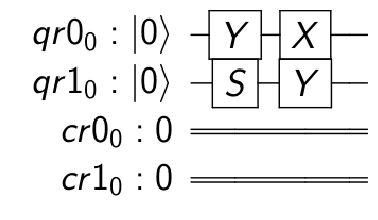

In [4]:
%matplotlib inline
plot_base_circuit(circuit_drawers)


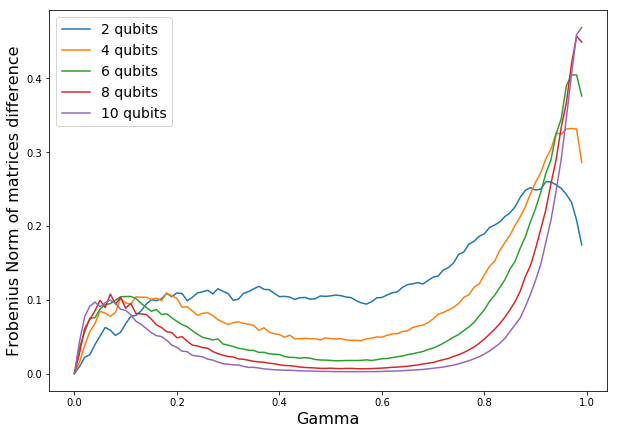

In [5]:
%matplotlib inline
plot_results(metric_results)

In [6]:
# Create qobj with increasing number of qubits (random base circuit)
metric_results, qobj, circuit_drawers = execute_experiment(ExperimentType.WITH_CLIFFORD)

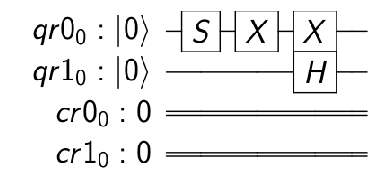

In [7]:
%matplotlib inline
plot_base_circuit(circuit_drawers)

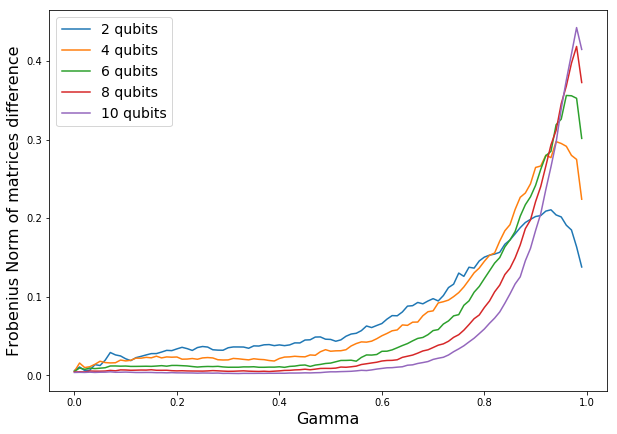

In [8]:
%matplotlib inline
plot_results(metric_results)

In [9]:
# Create qobj with increasing number of qubits (random base circuit)
metric_results, qobj, circuit_drawers = execute_experiment(ExperimentType.WITH_CLIFFORD)

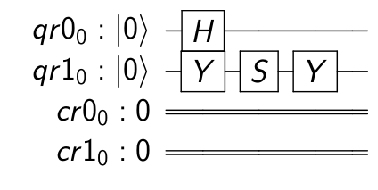

In [10]:
%matplotlib inline
plot_base_circuit(circuit_drawers)

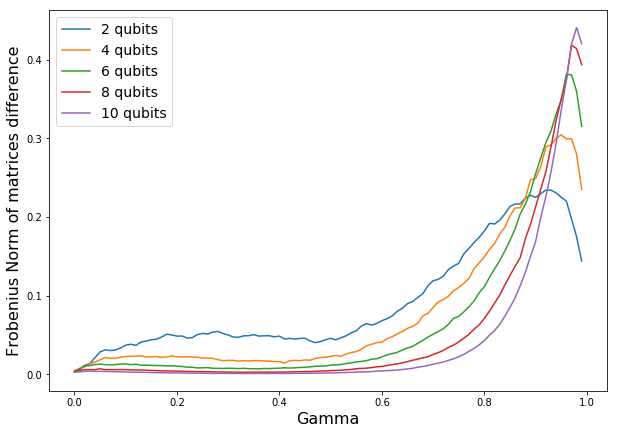

In [11]:
%matplotlib inline
plot_results(metric_results)

In [12]:
# Create qobj with increasing number of qubits (random base circuit)
metric_results, qobj, circuit_drawers = execute_experiment(ExperimentType.WITH_CLIFFORD)

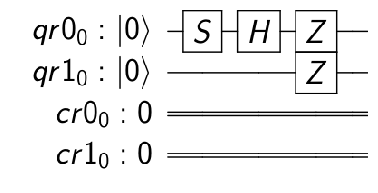

In [13]:
%matplotlib inline
plot_base_circuit(circuit_drawers)

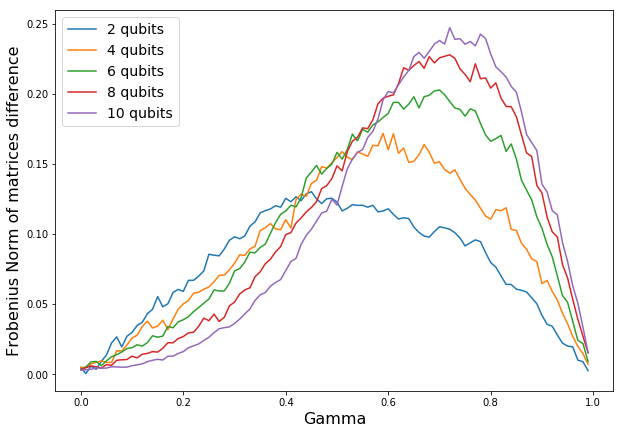

In [14]:
%matplotlib inline
plot_results(metric_results)